# 7. kodutöö: Tehisintellekti rakendamine
Rühm: Karolin Rips, Uku Zingel

Programm loeb kasutajale tema valitud keeles ette mõne artikli sisu. Alguses küsitakse kasutajalt teemat, mis teda huvitab. Valitud teema kohta otsitakse uudistelehtedelt artikleid ning väljastatakse juhuslikult 4 teemaga seotud artiklite pilti. Kasutaja saab valida ühe pildi, millele vastava artikli sisu loetakse talle tema soovitud keeles ette.

Andmed:

Delfi avaleht: https://www.delfi.ee/sitemap/news-1.xml

Delfi lemmikloom: https://lemmikloom.delfi.ee/sitemap/news-1.xml

Delfi ärileht: https://arileht.delfi.ee/sitemap/news-1.xml

Delfi sport: https://sport.delfi.ee/sitemap/news-1.xml

Delfi ilmateade: https://ilmateade.delfi.ee/sitemap/news-1.xml

Eesti Ekspress: https://ekspress.delfi.ee/sitemap/news-1.xml

Eesti Päevaleht: https://epl.delfi.ee/sitemap/news-1.xml

Maaleht: https://maaleht.delfi.ee/sitemap/news-1.xml

Alkeemia: https://alkeemia.delfi.ee/sitemap/news-1.xml

Kroonika: https://kroonika.delfi.ee/sitemap/news-1.xml

Naistekas: https://naistekas.delfi.ee/sitemap/news-1.xml

Anne & Stiil: https://annestiil.delfi.ee/sitemap/news-1.xml

Eesti Naine: https://eestinaine.delfi.ee/sitemap/news-1.xml

Pere ja Kodu: https://perejakodu.delfi.ee/sitemap/news-1.xml

Maakodu: https://maakodu.delfi.ee/sitemap/news-1.xml

Oma Maitse: https://omamaitse.delfi.ee/sitemap/news-1.xml

Tervis Pluss: https://tervispluss.delfi.ee/sitemap/news-1.xml

## Moodulite importimine

In [ ]:
!pip install gTTS
!pip install googletrans==4.0.0rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires click<8.0,>=5.1, but you have cl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Andmete sisselugemine
from bs4 import BeautifulSoup
import urllib.request

# Pilditöötlus
from PIL import Image

# Helitöötlus
from gtts import gTTS
import IPython.display as ipd

# Tõlkimine
import googletrans

## Info otsimine veebiteenustest

In [ ]:
# Funktsioon valitud teemaga seotud artiklite leidmiseks
def leia_artiklid(teema, täpsustus):
    # Siin on teemade valik, kui see ei ole "muu"
    if teema != "muu":
        if "delfi" in teema.lower():
            uudisteleht = "https://www.delfi.ee/sitemap/news-1.xml"
        elif "sport" in teema.lower():
            uudisteleht = "https://sport.delfi.ee/sitemap/news-1.xml"
        elif "lemmikloom" in teema.lower():
            uudisteleht = "https://lemmikloom.delfi.ee/sitemap/news-1.xml"
        elif ("äri" in teema.lower()) or ("majandus" in teema.lower()):
            uudisteleht = "https://arileht.delfi.ee/sitemap/news-1.xml"
        elif "ilm" in teema.lower():
            uudisteleht = "https://ilmateade.delfi.ee/sitemap/news-1.xml"
        elif "ekspress" in teema.lower():
            uudisteleht = "https://ekspress.delfi.ee/sitemap/news-1.xml"
        elif "maaleht" in teema.lower():
            uudisteleht = "https://maaleht.delfi.ee/sitemap/news-1.xml"
        elif "päevaleht" in teema.lower():
            uudisteleht = "https://epl.delfi.ee/sitemap/news-1.xml"
        elif "alkeemia" in teema.lower():
            uudisteleht = "https://alkeemia.delfi.ee/sitemap/news-1.xml"
        elif "kroonika" in teema.lower():
            uudisteleht = "https://kroonika.delfi.ee/sitemap/news-1.xml"
        elif ("anne" in teema.lower()) or ("stiil" in teema.lower()):
            uudisteleht = "https://annestiil.delfi.ee/sitemap/news-1.xml"
        elif "naine" in teema.lower():
            uudisteleht = "https://eestinaine.delfi.ee/sitemap/news-1.xml"
        elif "naistekas" in teema.lower():
            uudisteleht = "https://naistekas.delfi.ee/sitemap/news-1.xml"
        elif ("pere" in teema.lower()) and ("kodu" in teema.lower()):
            uudisteleht = "https://perejakodu.delfi.ee/sitemap/news-1.xml"
        elif "maakodu" in teema.lower():
            uudisteleht = "https://maakodu.delfi.ee/sitemap/news-1.xml"
        elif ("maitse" in teema.lower()) or ("toit" in teema.lower()):
            uudisteleht = "https://omamaitse.delfi.ee/sitemap/news-1.xml"
        elif "tervis" in teema.lower():
            uudisteleht = "https://tervispluss.delfi.ee/sitemap/news-1.xml"
    
        # XML andmete lugemine
        response = urllib.request.urlopen(uudisteleht, timeout = 10)
        content = response.read()
        soup = BeautifulSoup(content, features = "xml")
        # Artiklite salvestamine
        artiklid = soup.find_all("url")

        # Kui ei ole täpsustavat teemat, tagastame juhuslikult 4 artiklit valitud teema kohta
        if (täpsustus == ""):
            juhuslikud_artiklid = random.sample(artiklid, k = 4)
            return juhuslikud_artiklid

        # Leiame täpsustatud teemadega artiklid, vaadates läbi nende sisu (võib-olla oleks kiirem ja parem pealkirju vaadata)
        täpsustatud_artiklid = leia_täpsustustega_artikilitest(artiklid, täpsustus)
        mitu = len(täpsustatud_artiklid)

        # Lisame artikleid juurde, kui pole piisavalt sobivaid
        if (mitu == 0):
            print("Ei leidnud ühtegi täpsustatud teemaga artiklit, tagastan teemaga" + teema + " seotud artikleid.")
            return artiklid
        elif (mitu < 4):
            print("Ei leidnud piisavalt täpsustatud teemaga artikleid, lisasin ka üldise teema artikleid.")
            # Leitud teemakohaste artiklite linkide eraldamine
            täpsustatud_lingid = []
            for täpsustatud_artikkel in täpsustatud_artiklid:
                täpsustatud_lingid.append(täpsustatud_artikkel.loc.string)
            # Lisame sellised üldiseid artikleid juurde, mida pole veel näidatavate artiklite seas
            lisatavaid_artikleid = 4-mitu
            for artikkel in artiklid:
                if artikkel.loc.string not in täpsustatud_lingid:
                    täpsustatud_artiklid.append(artikkel)
                    lisatavaid_artikleid -= 1
                if lisatavaid_artikleid == 0:
                  break
        return täpsustatud_artiklid

    # Kui valitakse "muu" teema
    else:
        # Muu teema leidmine, otsib sisestatud teemat artiklite pealkirjadest ja märksõnadest 
        uudistelehed = ["https://www.delfi.ee/sitemap/news-1.xml", "https://ekspress.delfi.ee/sitemap/news-1.xml", "https://epl.delfi.ee/sitemap/news-1.xml"]
        sobivad_artiklid = []
        # Käime läbi kõik üldiste teemadega uudistelehed (Delif avaleht, Eesti Ekspress, Eesti Päevaleht)
        for leht in uudistelehed:
            # XML andmete lugemine
            response1 = urllib.request.urlopen(leht, timeout = 10)
            content1 = response1.read()
            soup1 = BeautifulSoup(content1, features = "xml")
            # Artiklite salvestamine
            artiklid1 = soup1.find_all("url")
            # Vaatame igal lehel läbi kõik artiklid
            for artikkel in artiklid1:
                marksonad = []
                # XML andmete lugemine
                response2 = urllib.request.urlopen(artikkel.loc.string, timeout = 10)
                content2 = response2.read()
                soup2 = BeautifulSoup(content2, features = "lxml")
                # Eraldame artiklite pealkirjad
                pealkiri = soup2.find("h1").string
                # Otsime artiklite pealkirjadest ja märksõnadest (kui neid on) sisestatud teemat
                if artikkel.news.keywords is not None:
                    if (täpsustus.lower() in pealkiri.lower()) or (täpsustus.lower() in artikkel.news.keywords.text.lower()):
                        sobivad_artiklid.append(artikkel)
                elif täpsustus.lower() in pealkiri.lower():
                    sobivad_artiklid.append(artikkel)
                # Kui 4 artiklit on leitud, lõpetame otsimise
                if len(sobivad_artiklid) == 4:
                    break
            if len(sobivad_artiklid) == 4:
                    break
        if len(sobivad_artiklid) == 0:
            print("Ei leidnud ühtegi soovitud teemaga artiklit.")
        return sobivad_artiklid

In [ ]:
def leia_täpsustustega_artikilitest(artiklid, täpsustus):
    sobivad_artiklid = []
    mitu = 0
    for artikkel in artiklid:
        mitu = len(sobivad_artiklid)
        if mitu == 4:
            break
        # Andmete lugemine veebilehelt
        response = urllib.request.urlopen(artikkel.loc.string, timeout = 10)
        content = response.read()
        soup = BeautifulSoup(content, features = "lxml")
        # Teksti eraldamine
        tekst = ""
        for data in soup.find_all("p"):
            tekst += data.get_text() + " "
        if (täpsustus.lower() in tekst.lower()):
            sobivad_artiklid.append(artikkel)
    return sobivad_artiklid

## Helitöötlus

In [ ]:
# Funktsioon artikli teksti kõneks teisendamiseks
def artikkel_koneks(artikkel, keel):
    # Andmete lugemine veebilehelt
    response = urllib.request.urlopen(artikkel, timeout = 10)
    content = response.read()
    soup = BeautifulSoup(content, features = "lxml")
    # Pealkirja eraldamine
    pealkiri = soup.find("h1").string
    # Teksti eraldamine
    tekst = ""
    for data in soup.find_all("p"):
        tekst += data.get_text() + " "
    # Kui artiklit soovitakse kuulata eesti keeles, pole vaja seda tõlkida
    if keel == "et":
        tolgitud_pealkiri = pealkiri
        tolgitud_tekst = tekst
    # Teiste keelte korral tõlgitakse pealkiri ja tekst eesti keelest soovitud keelde
    else:
        translator = googletrans.Translator()
        translation_pealkiri = translator.translate(pealkiri, src = "et", dest = keel)
        translation_tekst = translator.translate(tekst, src = "et", dest = keel)
        tolgitud_pealkiri = translation_pealkiri.text
        tolgitud_tekst = translation_tekst.text
    #print("Pealkiri: " + tolgitud_pealkiri)
    #print(tolgitud_tekst)
    # Artikli pealkirja ja sisu teisendamine kõneks
    loplik_tekst = tolgitud_pealkiri + " " + tolgitud_tekst
    speech = gTTS(text = loplik_tekst, lang = keel, slow = False)
    speech.save("speech.mp3")
    failinimi = "speech.mp3"
    return failinimi

## Inimese ja arvuti vaheline suhtlus

Palun sisesta üks järgnevatest, kui ükski pole meelepärane, siis palun sisesta 'muu'.
Teemad: lemmikloom, ilm, sport, äri, majandus, toit, tervis
Ajalehed: Delfi, Eesti Ekspress, Eesti Päevaleht, Maaleht, Alkeemia, Kroonika, Naistekas, Anne&Stiil, Eesti Naine, Pere ja Kodu, Maakodu, Oma Maitse
Teema: lemmikloom
Kui soovid teemat täpsustada (nt. Sport -> Jalgpall), siis palun sisesta täpsustus, kui ei, sisesta tühjus (vajuta Enterit)).
Täpsustus: kass
Otsin artikleid...


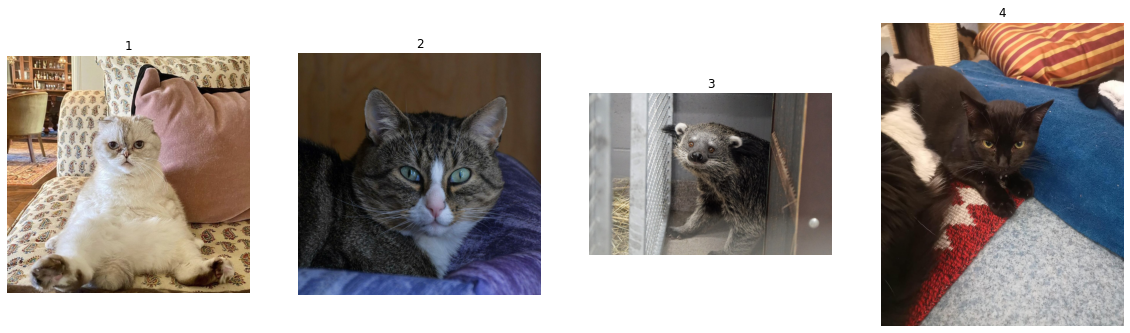

Vali pilt (1, 2, 3 või 4) millele vastavat artiklit soovid kuulata.
Pildi number: 1
Sisesta keel, milles soovid artiklit kuulata.
Keel: eesti


In [ ]:
print("Palun sisesta üks järgnevatest, kui ükski pole meelepärane, siis palun sisesta 'muu'.")
print("Teemad: lemmikloom, ilm, sport, äri, majandus, toit, tervis")
print("Ajalehed: Delfi, Eesti Ekspress, Eesti Päevaleht, Maaleht, Alkeemia, Kroonika, Naistekas, Anne&Stiil, Eesti Naine, Pere ja Kodu, Maakodu, Oma Maitse")
sobivad_teemad = ["lemmikloom", "ilm", "sport", "äri", "majandus", "toit", "tervis", "delfi", "eesti ekspress", "ekspress", 
                  "eesti päevaleht", "päevaleht", "maaleht", "alkeemia", "kroonika", "naistekas", "anne&stiil", "anne", "stiil", 
                  "eesti naine", "naine", "pere ja kodu", "pere", "kodu", "maakodu", "oma maitse", "maitse", "muu"]
teema = input("Teema: ")
while teema.lower() not in sobivad_teemad:
    print("Sisestada tuleb üks pakutud teemadest/ajalehtedest või 'muu'.")
    teema = input("Teema: ")
if (teema == "muu"):
    täpsustus = input("Teema: ")
else:
    print("Kui soovid teemat täpsustada (nt. Sport -> Jalgpall), siis palun sisesta täpsustus, kui ei, sisesta tühjus (vajuta Enterit)).")
    täpsustus = input("Täpsustus: ")
print("Otsin artikleid...")
# Teemaga seotud artiklite otsimine
artiklid = leia_artiklid(teema, täpsustus)
if len(artiklid) != 0:
    # Valitud artiklite piltide linkide eraldamine
    piltide_lingid = [artikkel.image.string for artikkel in artiklid]
    # Piltide linkide lõpust parameetrite (laius, kõrgus jne) eemaldamine
    pildid = [pilt.split('?w=', 1)[0] for pilt in piltide_lingid]
    # Piltide näitamine kasutajale
    fig, axs = plt.subplots(1, len(artiklid),  figsize = (20, 20))
    for i in range(len(artiklid)):
        pilt = np.array(Image.open(urllib.request.urlopen(pildid[i])))
        axs[i].imshow(pilt)
        axs[i].set_title(str(i+1))
        axs[i].axis('off')
    plt.show()
    # 0.1 sekundiline paus, et pildi valiku küsimine tuleks alles siis, kui pildid on välja prinditud
    plt.pause(0.1)
    # Piltide põhjal ühe artikli valimine
    print("Vali pilt (1, 2, 3 või 4) millele vastavat artiklit soovid kuulata.")
    valik = input("Pildi number: ")
    while valik not in ["1", "2", "3", "4"]:
        print("Sisestada tuleb täisarv 1, 2, 3 või 4.")
        valik = input("Pildi number: ")
    valitud_artikkel = artiklid[int(valik)-1].loc.string
    # Keele valimine
    keelte_koodid = list(googletrans.LANGUAGES.keys())
    keeled = list(googletrans.LANGUAGES.values())
    print("Sisesta keel, milles soovid artiklit kuulata.")
    keel = input("Keel: ")
    # Lisame keelele sõna "keel", et selle eesti -> inglise tõlge oleks õige
    if "keel" not in keel:
      keel = keel + " keel"
    # Tõlgime sisendi inglise keelde
    translator = googletrans.Translator()
    translation_keel = translator.translate(keel, src = "et", dest = "en")
    tolgitud_keel = translation_keel.text.lower()
    # Kui tõlgitud keele lõppu tekkis "language", eemaldame selle
    if " " in tolgitud_keel:
        tolgitud_keel = tolgitud_keel.split(" ", 1)[0]
    # Keelte sõnastikust sisestatud keele otsimine ja selle põhjal koodi valimine
    while tolgitud_keel not in list(googletrans.LANGUAGES.values()):
      print("Ma ei leidnud sellist keelt. Sisesta keel uuesti.")
      keel = input("Keel: ")
      if "keel" not in keel:
        keel = keel + " keel"
      translator = googletrans.Translator()
      translation_keel = translator.translate(keel, src = "et", dest = "en")
      tolgitud_keel = translation_keel.text.lower()
      if " " in tolgitud_keel:
          tolgitud_keel = tolgitud_keel.split(" ", 1)[0]
    keele_indeks = keeled.index(tolgitud_keel)
    keele_kood = keelte_koodid[keele_indeks]
    # Artikli sisu teisendamine heliks
    helifail = artikkel_koneks(valitud_artikkel, keele_kood)
    ipd.display(ipd.Audio(helifail))